# Task 2.4

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [3]:
df = pd.read_csv('citibike_weather_2022.csv', low_memory=False)

In [6]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avg_temp              float64
dtype: object

In [9]:
sns.set_theme(style="whitegrid", palette="pastel")

### Bar Chart

In [17]:
df['value'] = 1

In [22]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [24]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,906
1,1 Ave & E 16 St,3282
2,1 Ave & E 18 St,3247
3,1 Ave & E 30 St,1955
4,1 Ave & E 39 St,1946
...,...,...
1533,Wyckoff Av & Stanhope St,608
1534,Wyckoff Ave & Gates Ave,593
1535,Wyckoff St & Nevins St,401
1536,Wythe Ave & Metropolitan Ave,2149


In [27]:
top20 = df_t.nlargest(20, 'value')

In [30]:
top20

,start_station_name,value
1385,W 21 St & 6 Ave,5846
8,1 Ave & E 68 St,5422
656,E 17 St & Broadway,4615
1316,University Pl & E 14 St,4263
384,Broadway & E 21 St,4224
414,Broadway & W 58 St,4173
263,8 Ave & W 33 St,4014
687,E 33 St & 1 Ave,3948
505,Clinton St & Grand St,3863
271,9 Ave & W 22 St,3611


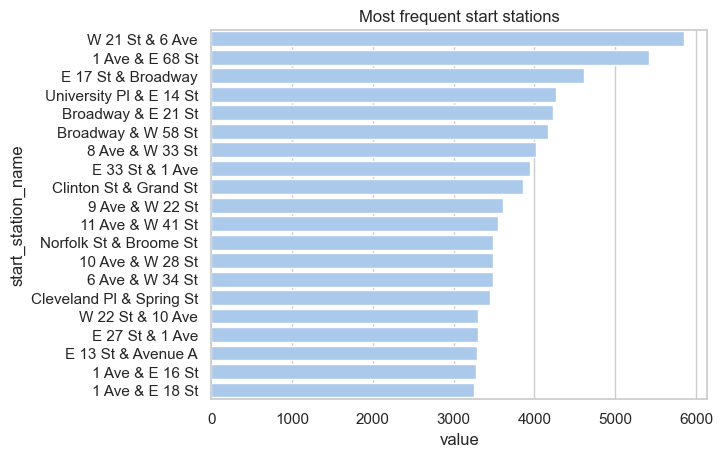

In [49]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8736\2730572241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='value', y='start_station_name', palette=colors)


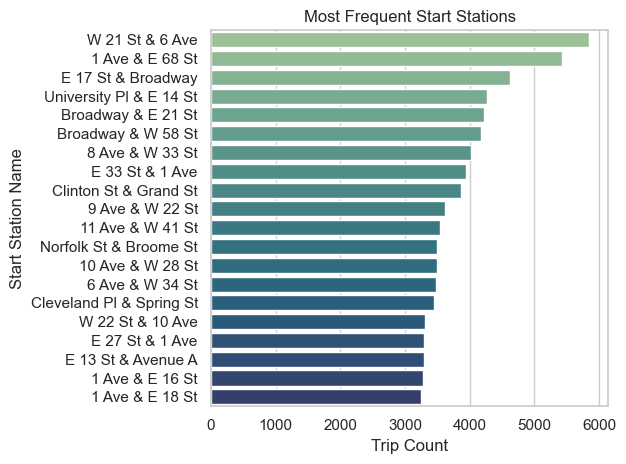

In [52]:
# Create a color palette with as many colors as bars
colors = sns.color_palette("crest", n_colors=len(top20))

# Plot the bar chart with color
sns.barplot(data=top20, x='value', y='start_station_name', palette=colors)

plt.title("Most Frequent Start Stations")
plt.xlabel("Trip Count")
plt.ylabel("Start Station Name")
plt.tight_layout()
plt.show()

### Dual axis line plot

In [62]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [68]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [70]:
df_group.head()

,date,ride_id
0,2021-07-22,1
1,2021-09-13,1
2,2021-11-07,1
3,2021-11-09,1
4,2021-11-13,1


In [ ]:
#1: Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

#2: Group by date to count number of rides per day
df_group = df.groupby('date').size().reset_index(name='bike_rides_daily')

#3: Merge daily counts back into main DataFrame
df = df.merge(df_group, on='date', how='outer', indicator='merge_flag')

#4: Check how merge went
print(df['merge_flag'].value_counts(dropna=False))

#5: Check shape for a couple of known dates
print("Shape of July 1st is", df[df['date'] == '2022-07-01'].shape)
print("Shape of July 2nd is", df[df['date'] == '2022-07-02'].shape)
#6: Set date as index (for time series plots, etc.)
df_temp = df.set_index('date')

#7: See available columns
print(df_temp.columns)

In [85]:
df_temp.columns

Index(['ride_id_x', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avg_temp', 'value', 'month', 'ride_id_y',
       'merge_flag'],
      dtype='object')

In [88]:
df_temp.head()

,ride_id_x,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avg_temp,value,month,ride_id_y,merge_flag
date,,,,,,,,,,,,,,,,,,
2021-07-22,2F298092D779509A,classic_bike,49:56.1,15:37.6,Stanton St & Norfolk St,5445.07,Pier 40 Dock Station,SYS035,40.720747,-73.986274,40.728660,-74.011980,casual,NaN,1,2021-07,1,both
2021-09-13,84EA4DA50AC94A38,classic_bike,30:02.1,18:25.7,E 14 St & Avenue B,5736.09,58 St & 2 Ave - Brooklyn Army Terminal Vaccina...,3138.09,40.729387,-73.977724,40.644512,-74.021506,casual,NaN,1,2021-09,1,both
2021-11-07,4D62825A6FC8FB5C,classic_bike,15:10.8,59:11.7,Hazen St & 20 Ave,7032.06,Brook Ave & E 138 St,7707.08,40.772092,-73.895166,40.807408,-73.919240,casual,NaN,1,2021-11,1,both
2021-11-09,218009D78518E321,classic_bike,38:12.1,39:13.5,Central Park North & Adam Clayton Powell Blvd,7617.07,NaN,NaN,40.799484,-73.955613,NaN,NaN,casual,NaN,1,2021-11,1,both
2021-11-13,8BF20A472C20229F,classic_bike,15:29.5,24:16.7,Grand Concourse & E 164 St,8057.02,Fulton St & Pearl St,5024.09,40.829608,-73.921461,40.707722,-74.004386,casual,NaN,1,2021-11,1,both


In [91]:
df_temp.columns

Index(['ride_id_x', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avg_temp', 'value', 'month', 'ride_id_y',
       'merge_flag'],
      dtype='object')

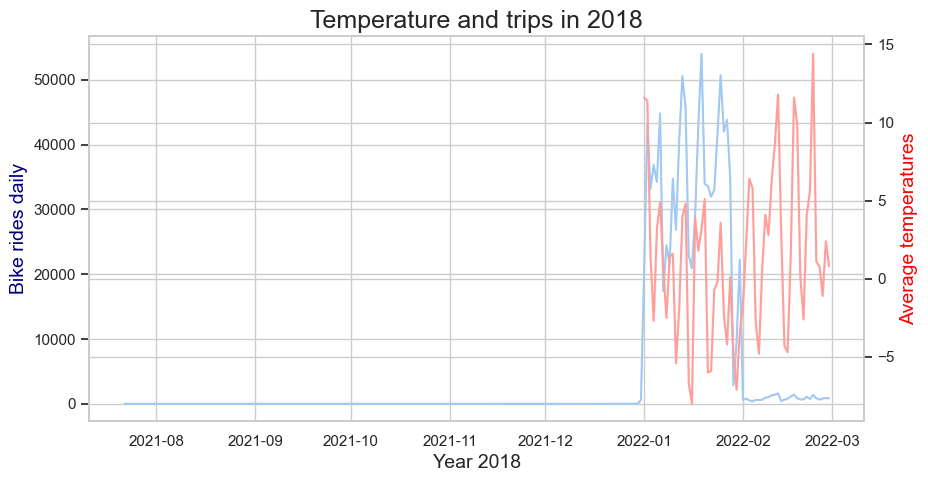

In [105]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['ride_id_y'], color = "b")
ax.set_xlabel("Year 2018", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avg_temp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2018', fontsize = 18)
plt.show()

### BoxPlot

In [112]:
df.dtypes

ride_id_x                     object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avg_temp                     float64
value                          int64
month                      period[M]
ride_id_y                      int64
merge_flag                  category
dtype: object

In [115]:
df['member_casual']

0          casual
1          casual
2          casual
3          casual
4          casual
            ...  
1048570    casual
1048571    member
1048572    member
1048573    member
1048574    member
Name: member_casual, Length: 1048575, dtype: object

In [118]:
df.columns

Index(['ride_id_x', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avg_temp', 'value', 'month', 'ride_id_y',
       'merge_flag'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_8736\2779875369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='member_casual', y='avg_temp', data=df, palette='coolwarm')


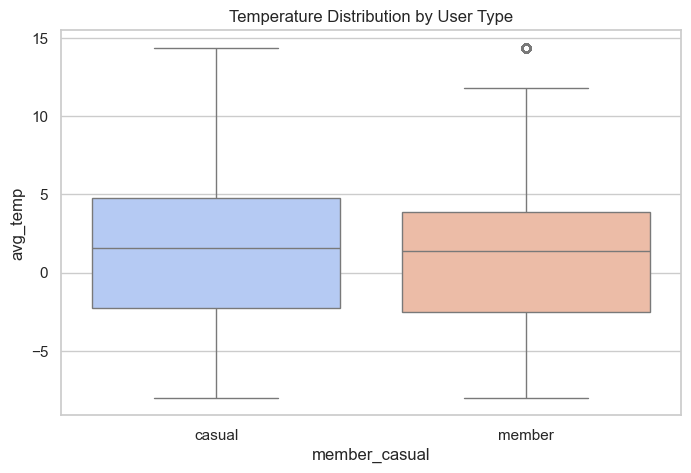

In [153]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='member_casual', y='avg_temp', data=df, palette='coolwarm')
plt.title('Temperature Distribution by User Type')
plt.show()

##### The box plot shows that both members and casual users ride in a similar range of average temperatures, although casual users appear to have more variability. The median temperatures are similar, but casual users ride in slightly more extreme conditions.

#### Violin plot

C:\Users\hp\AppData\Local\Temp\ipykernel_8736\2107936514.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='member_casual', y='avg_temp', data=df, palette='coolwarm')


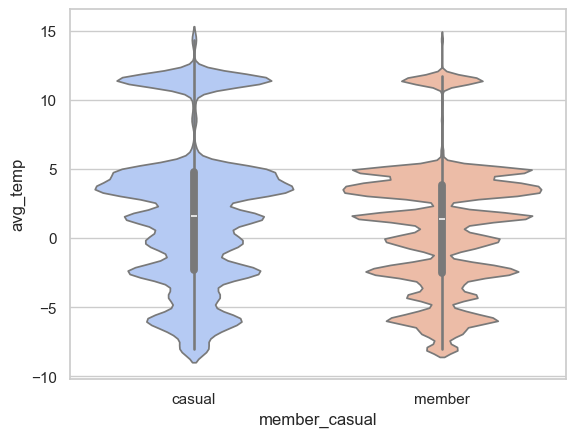

In [161]:
sns.violinplot(x='member_casual', y='avg_temp', data=df, palette='coolwarm')
plt.show()

###  FacetGrid Plot

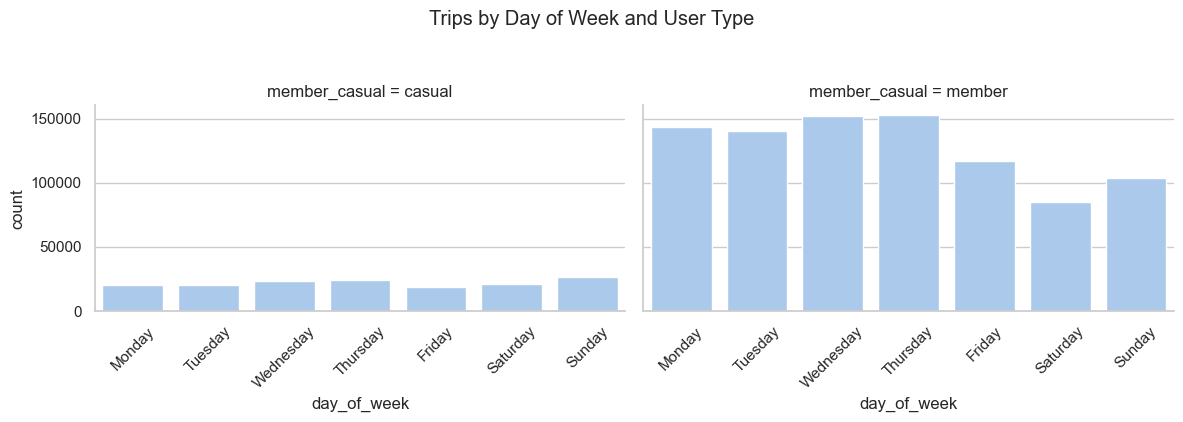

In [159]:
df['day_of_week'] = df['date'].dt.day_name()

g = sns.FacetGrid(df, col='member_casual', height=4, aspect=1.5)
g.map(sns.countplot, 'day_of_week', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
g.set_xticklabels(rotation=45)
g.fig.suptitle("Trips by Day of Week and User Type", y=1.05)
plt.tight_layout()
plt.show()


##### This plot reveals that members tend to use CitiBikes more consistently during weekdays, likely for commuting. In contrast, casual users ride more on weekends, pointing to recreational usage.

### Histogram

In [167]:
sns.set_style('darkgrid')

In [170]:
%matplotlib inline

<Figure size 900x500 with 0 Axes>

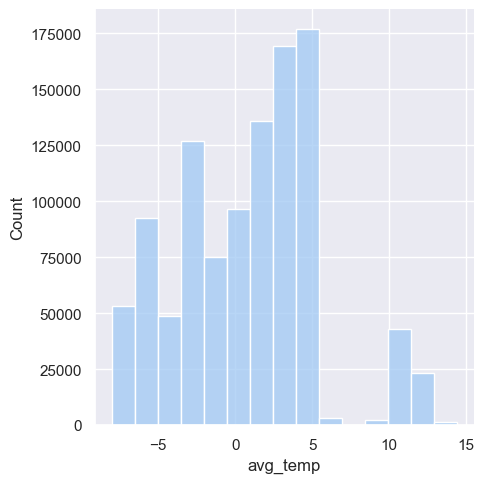

In [186]:
plt.figure(figsize=(9,5))
sns.displot(df['avg_temp'], bins = 15)
plt.show()

In [189]:
sns.reset_orig()

<Figure size 900x500 with 0 Axes>

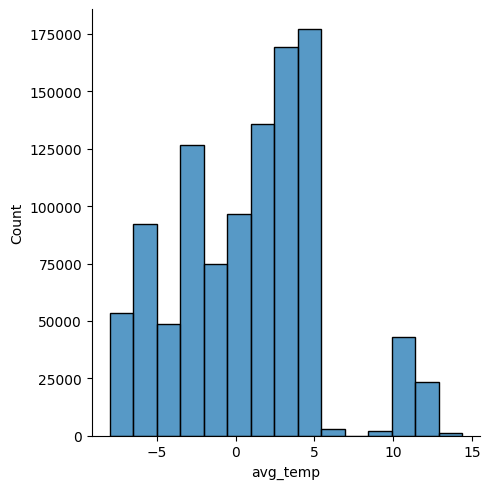

In [192]:
plt.figure(figsize=(9,5))
sns.displot(df['avg_temp'], bins = 15)
plt.show()

In [195]:
sns.set_style('whitegrid')

<Figure size 900x500 with 0 Axes>

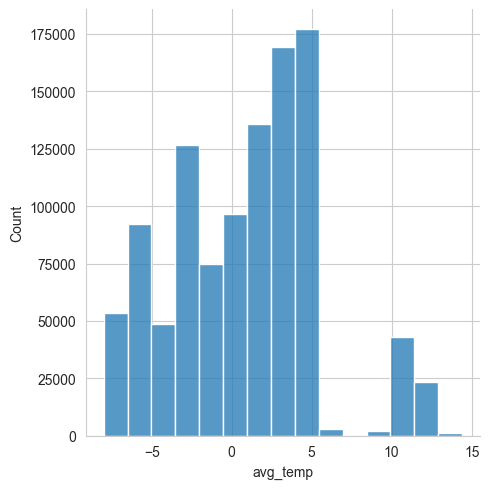

In [198]:
plt.figure(figsize=(9,5))
sns.displot(df['avg_temp'], bins = 15)
plt.show()

In [208]:
sns.set_style('dark')

<Figure size 900x500 with 0 Axes>

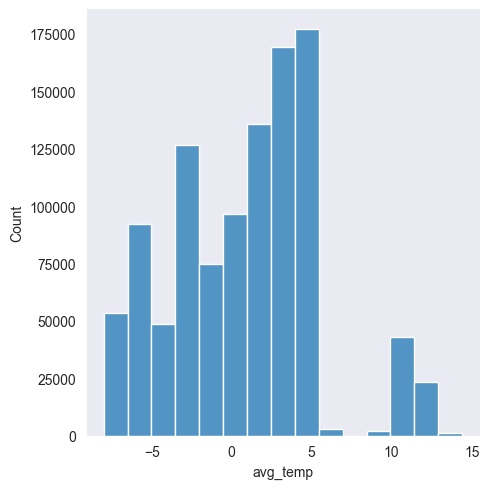

In [211]:
plt.figure(figsize=(9,5))
sns.displot(df['avg_temp'], bins = 15)
plt.show()

In [214]:
sns.set_style('white')

<Figure size 900x500 with 0 Axes>

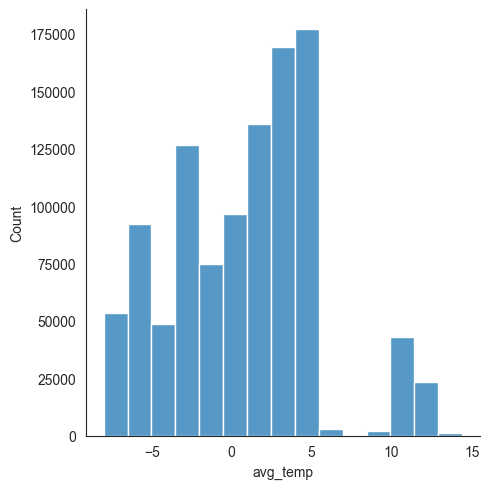

In [217]:
plt.figure(figsize=(9,5))
sns.displot(df['avg_temp'], bins = 15)
plt.show()

In [219]:
sns.set_style('ticks')

<Figure size 900x500 with 0 Axes>

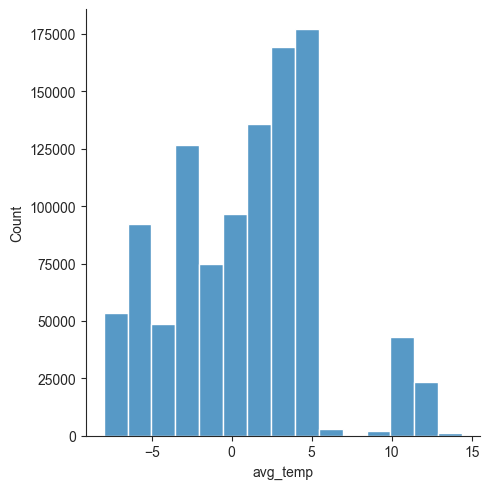

In [222]:
plt.figure(figsize=(9,5))
sns.displot(df['avg_temp'], bins = 15)
plt.show()

In [225]:
sns.set_theme()

<Figure size 900x500 with 0 Axes>

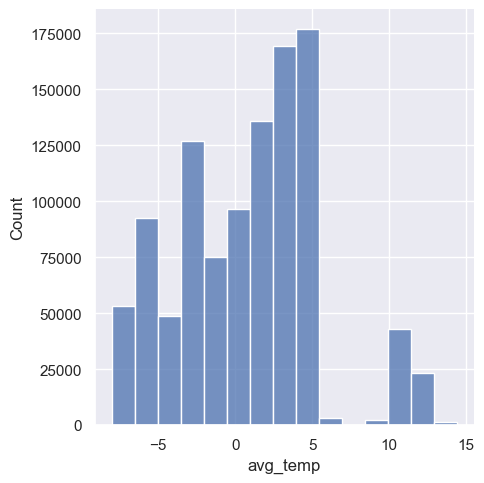

In [227]:
plt.figure(figsize=(9,5))
sns.displot(df['avg_temp'], bins = 15)
plt.show()

### Palettes

In [242]:
sns.set_style("dark")
sns.set_palette('PuRd_r')

<Figure size 900x500 with 0 Axes>

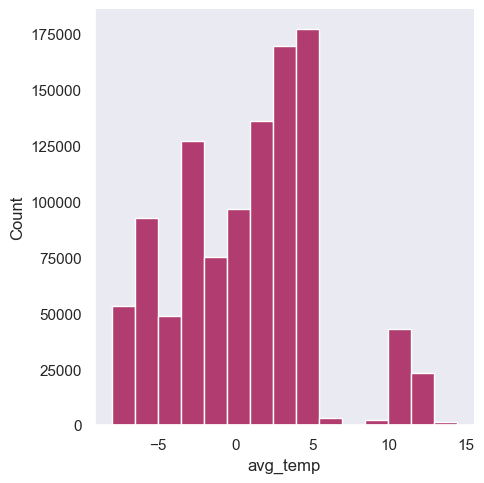

In [244]:
plt.figure(figsize=(9,5))
sns.displot(df['avg_temp'], bins = 15)
plt.show()

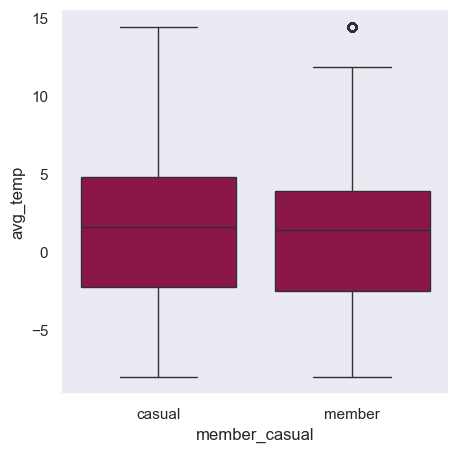

In [247]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'member_casual', y = 'avg_temp', data = df)
plt.show()

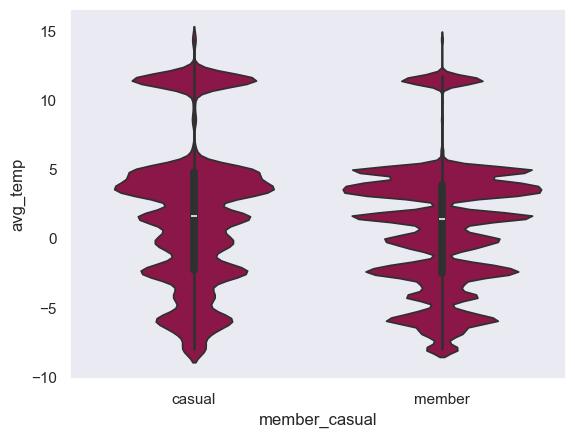

In [254]:
sns.violinplot(x = 'member_casual', y = 'avg_temp', data = df)
plt.show()

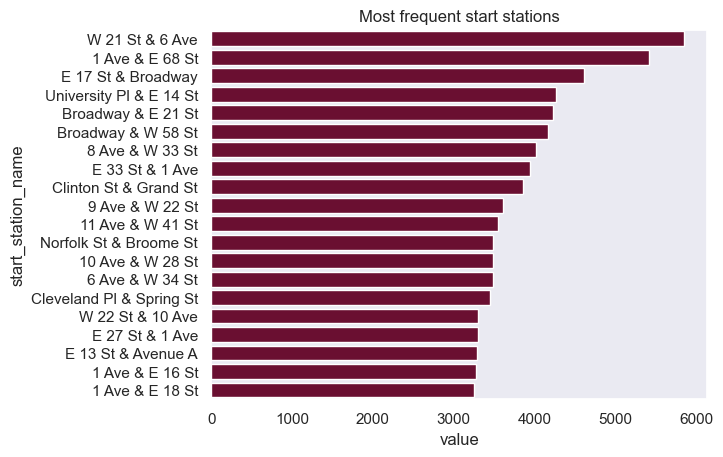

In [261]:
sns.set_palette('PuRd_r', n_colors = 20)
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

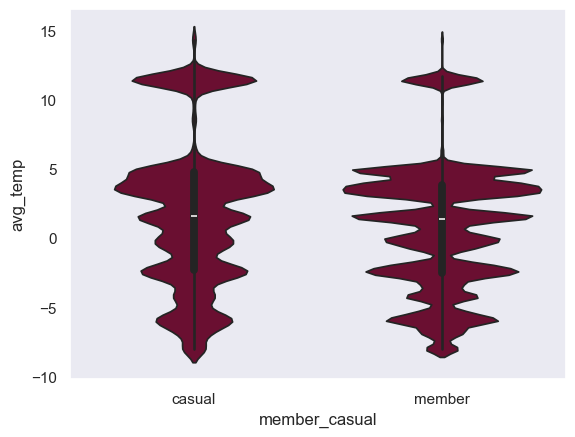

In [266]:
sns.violinplot(x = 'member_casual', y = 'avg_temp', data = df)
plt.show()

In [268]:
plt.figure(figsize = (10, 5))
with sns.color_palette('PuRd_r', n_colors = 20):
    sns.barplot(data = top20, x = 'value', y = 'start_station_name').set_title("Most frequent start stations")

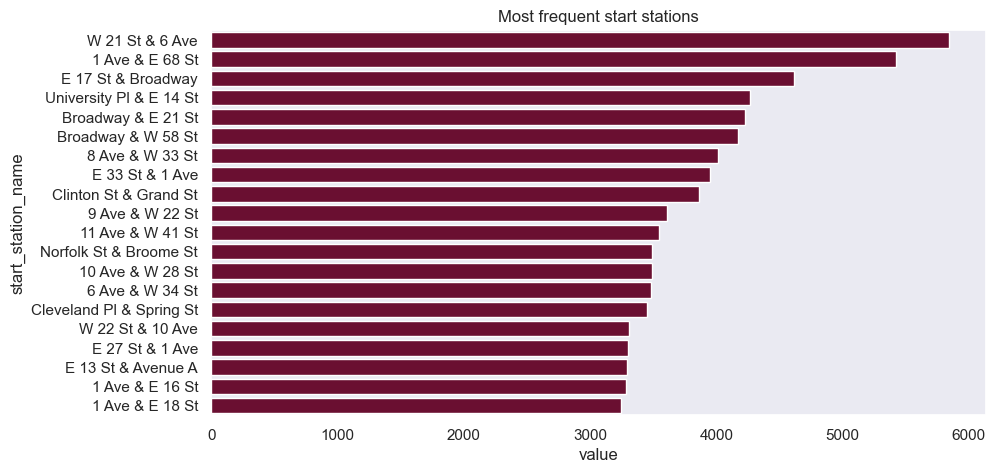

In [270]:
plt.show()

In [285]:
df.to_csv('nyc_data.csv')

In [286]:
import os
print(os.getcwd())

C:\Users\hp\Documents\.ipynb_checkpoints
